In [1]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import imghdr
import os
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
#stop photos

# Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data'

# Create an empty list to store the images
X = []
y = []
pred_class = []
count = 0


for foldername in os.listdir(path_to_folder):
      
        path_to_sub_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\'+str(foldername)
# Loop over all the files in the folder
        
        
        
        for filename in os.listdir(path_to_sub_folder):
            # Check if the file is an image
           
          
            
  
            if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                # Load the image using OpenCV
                try:

                        img = cv2.imread(os.path.join(path_to_sub_folder, filename))
                        resized_img = cv2.resize(img, (224, 224))
                        normalized_img = resized_img / 255.0

                        # Add the image to the list
                        X.append(normalized_img)
                        y.append(count)
                        


                except:       

                        image_path = str(path_to_sub_folder)+str(filename)

                        if os.path.exists(image_path):
                                os.remove(image_path)
                                print(f"Deleted {image_path}")
                        else:
                                print(f"{image_path} does not exist")
                                
                                
        pred_class.append(foldername)         
        count = count + 1

C:\Users\gillp\Downloads\deep learning\traffic sign\image data\Construction zone signRoad-Construction-Zones-–-Workers-in-Danger.jpeg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\do not enter115-1150048_sign-do-not-enter-placa-de-sinalização-em-ingles.png does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\do not enterのサイン.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\One way signSeñaletica_TW-04.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\One way signthumb-400-400-road-signs-board_1028.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\One way signニューヨークマンハッタン米国の道路標識入らないと片道.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\Pedestrian crossing signbc506546-10b0-46ae-a5b2-e1f89f248b12.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\Pedestrian crossing signbef73

In [3]:
len(y)

3752

In [4]:
y_arr = np.array(y)
X_arr = np.array(X)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(3001, 224, 224, 3)

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

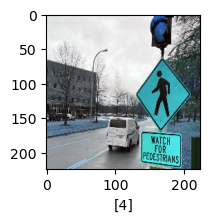

In [9]:
plot_sample(X_test, y_test,5)


# Transfer learning

In [10]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

TF version: 2.8.2
Hub version: 0.8.0
GPU is NOT AVAILABLE


In [11]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [12]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

#base_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [13]:
do_fine_tuning = False

In [14]:

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4", trainable=do_fine_tuning),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
94/94 [==============================] - 35s 318ms/step - loss: 1.6866 - acc: 0.4329
Epoch 2/10
13/94 [===>..........................] - ETA: 27s - loss: 1.1007 - acc: 0.6587

KeyboardInterrupt: 

In [16]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 8s 290ms/step - loss: 1.2113 - acc: 0.6112


[1.2113428115844727, 0.6111850738525391]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.44      0.54        84
           1       0.65      0.46      0.54        52
           2       0.78      0.62      0.69        29
           3       0.67      0.64      0.65       130
           4       0.55      0.69      0.61       140
           5       0.74      0.73      0.73        66
           6       0.40      0.45      0.42        67
           7       0.52      0.67      0.59        83
           8       0.74      0.76      0.75        83
           9       0.67      0.24      0.35        17

    accuracy                           0.61       751
   macro avg       0.64      0.57      0.59       751
weighted avg       0.63      0.61      0.61       751



import os
from PIL import Image

# Define the directory containing the images to classify
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random'

# Loop over each image in the directory
for filename in os.listdir(path_to_folder):
        # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Load the image using OpenCV
        try:
            
                #count = count+1
                img = cv2.imread(os.path.join(path_to_folder, filename))

                resized_img = cv2.resize(img, (224, 224))
                img_array = np.array(resized_img)
                normalized_img = img_array / 255.0
                img_end = np.expand_dims(normalized_img, axis=0)



                # Classify the image and store the result

                y_pred = model.predict(img_end)
                y_pred_classes = [np.argmax(element) for element in y_pred]

                # Traceback the original filename of the image
                print(y_pred_classes)
                print(f"Original filename: {filename}, Classification result: {y_pred_classes}")
                if(y_pred_classes[0] ==0):

                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random\\'+str(filename)

                        if os.path.exists(image_path):
                            os.remove(image_path)
                            print(f"Deleted {image_path}")
                        else:
                            print(f"{image_path} does not exist")

        except:
                        #d_count = 0        
                
                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\random\\'+str(filename)

                        if os.path.exists(image_path):
                            os.remove(image_path)
                            print(f"Deleted {image_path}")
                        else:
                            print(f"{image_path} does not exist")
                


In [ ]:
img = plt.imread('4c6.jpg')
img = cv2.resize(img, (224, 224))
img = np.array(img)
img = img / 255.0
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# Predict the class of the test image
predictions = model.predict(img)
class_index = np.argmax(predictions)
confidence_scores = predictions
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))



#if (probabilities[0][0] < 0.6) & (probabilities[0][1] < 0.6 ):
#    print("no class")


In [ ]:
pred_class[class_index]

In [ ]:
confidence_scores = predictions
# apply softmax function to obtain probabilities
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))

print(probabilities)

In [ ]:
class_dict = {
    str(pred_class[0]): '0',
    str(pred_class[1]): '1',
    str(pred_class[2]): '2',
    str(pred_class[3]): '3',
    str(pred_class[4]): '4',
    str(pred_class[6]): '6',
    str(pred_class[7]): '7',
    str(pred_class[8]): '8',
    str(pred_class[9]): '9',
   
}

In [20]:
from keras.models import load_model
model.save('model5.h5')

In [21]:
model_final = load_model('model5.h5')

ValueError: Unknown layer: KerasLayer. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.